## Checks book for final assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#tickets = pd.read_csv(f"D:/Docs/train_1.csv", encoding='mac_roman')
tickets = pd.read_csv(f"D:/SYED/Docs/train.csv", encoding='mac_roman')

C:\Users\SYED\AppData\Local\Temp\ipykernel_18640\2663199239.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets = pd.read_csv(f"D:/SYED/Docs/train.csv", encoding='mac_roman')


In [4]:
tickets.head(3)

,ticket_id,agency_name,inspector_name,violator_name,city,state,zip_code,ticket_issued_date,disposition,fine_amount,...,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_status,collection_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",CHICAGO,IL,60606,16/03/2004 11:40,Responsible by Default,250.0,...,25.0,0,0,305.0,0.0,305.0,NO PAYMENT APPLIED,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",Detroit,MI,48208,23/04/2004 12:30,Responsible by Determination,750.0,...,75.0,0,0,855.0,780.0,75.0,PAID IN FULL,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",DETROIT,MI,48223,26/04/2004 13:40,Not responsible by Dismissal,250.0,...,0.0,0,0,0.0,0.0,0.0,NO PAYMENT APPLIED,NaN,not responsible by disposition,NaN


In [5]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ticket_id           250306 non-null  int64  
 1   agency_name         250306 non-null  object 
 2   inspector_name      250306 non-null  object 
 3   violator_name       250272 non-null  object 
 4   city                250306 non-null  object 
 5   state               250213 non-null  object 
 6   zip_code            250305 non-null  object 
 7   ticket_issued_date  250306 non-null  object 
 8   disposition         250306 non-null  object 
 9   fine_amount         250305 non-null  float64
 10  admin_fee           250306 non-null  int64  
 11  state_fee           250306 non-null  int64  
 12  late_fee            250306 non-null  float64
 13  discount_amount     250306 non-null  int64  
 14  clean_up_cost       250306 non-null  int64  
 15  judgment_amount     250306 non-nul

<AxesSubplot:>

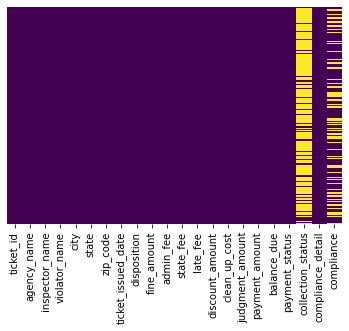

In [6]:
sns.heatmap(tickets.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
tickets.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name', 'city',
       'state', 'zip_code', 'ticket_issued_date', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_status', 'collection_status', 'compliance_detail',
       'compliance'],
      dtype='object')

In [8]:
tickets.describe()

,ticket_id,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance
count,250306.000000,250305.000000,250306.000000,250306.000000,250306.000000,250306.000000,250306.0,250306.000000,250306.000000,250306.000000,159880.000000
mean,152665.543099,374.423435,12.774764,6.387382,21.494506,0.125167,0.0,268.685356,48.898986,222.449058,0.072536
std,77189.882881,707.195807,9.607344,4.803672,56.464263,3.430178,0.0,626.915212,222.422425,606.394010,0.259374
min,18645.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-7750.000000,0.000000
25%,86549.250000,200.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,152597.500000,250.000000,20.000000,10.000000,10.000000,0.000000,0.0,140.000000,0.000000,25.000000,0.000000
75%,219888.750000,250.000000,20.000000,10.000000,25.000000,0.000000,0.0,305.000000,0.000000,305.000000,0.000000
max,366178.000000,10000.000000,20.000000,10.000000,1000.000000,350.000000,0.0,11030.000000,11075.000000,11030.000000,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = (                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))